<a href="https://colab.research.google.com/github/mudita11/Covid-visual/blob/main/PartI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import psycopg2
import pandas as pd
import datetime
import seaborn as sns

In [3]:
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19')
cur = conn.cursor()

In [4]:
sql_command = """SELECT DISTINCT source FROM epidemiology ORDER by source"""
df_epidemiology = pd.read_sql(sql_command, conn)
df_epidemiology.values.flatten()

array(['AUS_C1A', 'BEL_LE', 'BEL_SCI', 'BEL_WY', 'BRA_MSHM', 'CAN_GOV',
       'CHE_OPGOV', 'CHN_ICL', 'DEU_JPGG', 'ESP_ISCIII', 'ESP_MS',
       'ESP_MSVP', 'EU_ZH', 'FRA_SPF', 'FRA_SPFCG', 'GBR_NIDH', 'GBR_PHE',
       'GBR_PHS', 'GBR_PHTW', 'GBR_PHW', 'IDN_GTPPC', 'IND_COVIND',
       'IRL_HSPC', 'IRQ_GOV', 'ITA_PC', 'ITA_PCDM', 'JPN_C1JACD',
       'KOR_DS4C', 'LAT_DSRP', 'LBN_GOV', 'MYS_MHYS', 'NGA_CDC',
       'NGA_HERA', 'NGA_SO', 'NLD_CW', 'PAK_GOV', 'POL_COVID', 'POL_GOV',
       'POL_ROG', 'POL_WIKI', 'PRT_MSDS', 'RUS_GOV', 'SAU_GOV', 'SWE_GM',
       'SWE_SIR', 'THA_STAT', 'TUR_MHOE', 'UAE_GOV', 'USA_CTP', 'USA_NYT',
       'WRD_ECDC', 'WRD_ECDC_WEEKLY', 'WRD_WHO', 'WRD_WHOJHU',
       'ZAF_DSFSI'], dtype=object)

In [8]:
source = "USA_CTP"

sql_command = """SELECT * FROM epidemiology WHERE source = %(source)s ORDER by date DESC"""
df_epidemiology = pd.read_sql(sql_command, conn, params={'source': source})
df_epidemiology.head()

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,USA_CTP,2021-03-07,United States,USA,Wisconsin,None,None,7106.0,621654.0,2273.0,553203.0,7080595.0,26457.0,None,[USA.50_1]
1,USA_CTP,2021-03-07,United States,USA,Washington,None,None,5041.0,344532.0,NaN,NaN,5393756.0,19599.0,None,[USA.48_1]
2,USA_CTP,2021-03-07,United States,USA,Missouri,None,None,8161.0,480643.0,NaN,NaN,4565866.0,NaN,None,[USA.26_1]
3,USA_CTP,2021-03-07,United States,USA,Kentucky,None,None,4819.0,410709.0,4034.0,48145.0,3975672.0,19457.0,None,[USA.18_1]
4,USA_CTP,2021-03-07,United States,USA,Indiana,None,None,12737.0,667262.0,7600.0,NaN,8242367.0,43217.0,None,[USA.15_1]


In [4]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_CTP' ORDER by date DESC"""
df_epidemiology = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
#df_epidemiology.head()
print(df_epidemiology['adm_area_1'].nunique())
df_epidemiology['adm_area_1'].unique()

56


array(['Wisconsin', 'Washington', 'Missouri', 'Kentucky', 'Indiana',
       'Illinois', 'Wyoming', 'Vermont', 'Virgin Islands', 'Virginia',
       'Utah', 'Texas', 'Tennessee', 'South Dakota', 'South Carolina',
       'Rhode Island', 'Pennsylvania', 'Oregon', 'Oklahoma', 'Ohio',
       'New York', 'Nevada', 'New Mexico', 'New Jersey', 'New Hampshire',
       'North Dakota', 'Minnesota', 'Michigan', 'Maine', 'Maryland',
       'Louisiana', 'Florida', 'Delaware', 'District of Columbia',
       'Connecticut', 'Colorado', 'California', 'Arizona',
       'American Samoa', 'Arkansas', 'Alabama', 'Alaska', 'Idaho', 'Iowa',
       'Mississippi', 'Montana', 'North Carolina', 'Nebraska',
       'Puerto Rico', 'Hawaii', 'Guam', None, 'Georgia', 'Kansas',
       'Massachusetts', 'Northern Mariana Islands', 'West Virginia'],
      dtype=object)

In [6]:
sql_command = """SELECT * FROM epidemiology WHERE adm_area_1 = 'Texas' """
df_epidemiology = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
df_epidemiology.head()
df_epidemiology.shape

(141139, 15)

In [22]:
print(df_epidemiology.columns)
print(df_epidemiology['date'].nunique())
df_epidemiology['date'].unique()[:10]

Index(['source', 'date', 'country', 'countrycode', 'adm_area_1', 'adm_area_2',
       'adm_area_3', 'tested', 'confirmed', 'recovered', 'dead',
       'hospitalised', 'hospitalised_icu', 'quarantined', 'gid'],
      dtype='object')
612


array([datetime.date(2021, 9, 5), datetime.date(2021, 5, 12),
       datetime.date(2021, 8, 23), datetime.date(2021, 6, 2),
       datetime.date(2021, 7, 4), datetime.date(2021, 4, 5),
       datetime.date(2021, 4, 6), datetime.date(2021, 4, 7),
       datetime.date(2021, 4, 8), datetime.date(2021, 4, 9)], dtype=object)

In [28]:
start_date = datetime.date(year=2020,  month=3,  day=1)
df_epidemiology = df_epidemiology[df_epidemiology['date'] >= start_date]

In [29]:
df_epidemiology.shape

(141103, 15)

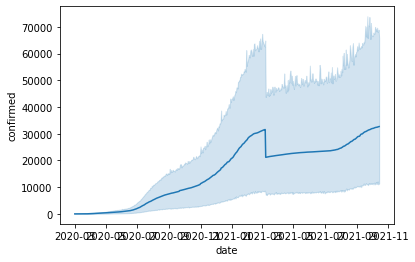

In [31]:
sns.lineplot(data=df_epidemiology, x="date", y="confirmed")